# Лабораторная работа №2
## по предмету "Системы искусственного интеллекта"

В данной лабораторной работе вы будете работать с набором данных, который содержит информацию о технических характеристиках ноутбуков и их цену.
Целью работы является изучение теоретических основ методов машинного обучения.

В наборе данных для лабораторной работы содержится абор характеристик  мобильных телефонов, включая мощность аккумулятора, характеристики камеры, поддержку сети, память, размеры экрана и другие атрибуты. Столбец «price_range» классифицирует телефоны по ценовым диапазонам (этот столбец необходимо предсказать).

### Задание 1

Выгрузите данные из датасета. Изучите колонки, проверьте наличие пропусков. Постройте матрицу корреляции между признаками и целевой переменной. Сделайте выводы, что показывает эта матрица.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
df = pd.read_csv('AIS2.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


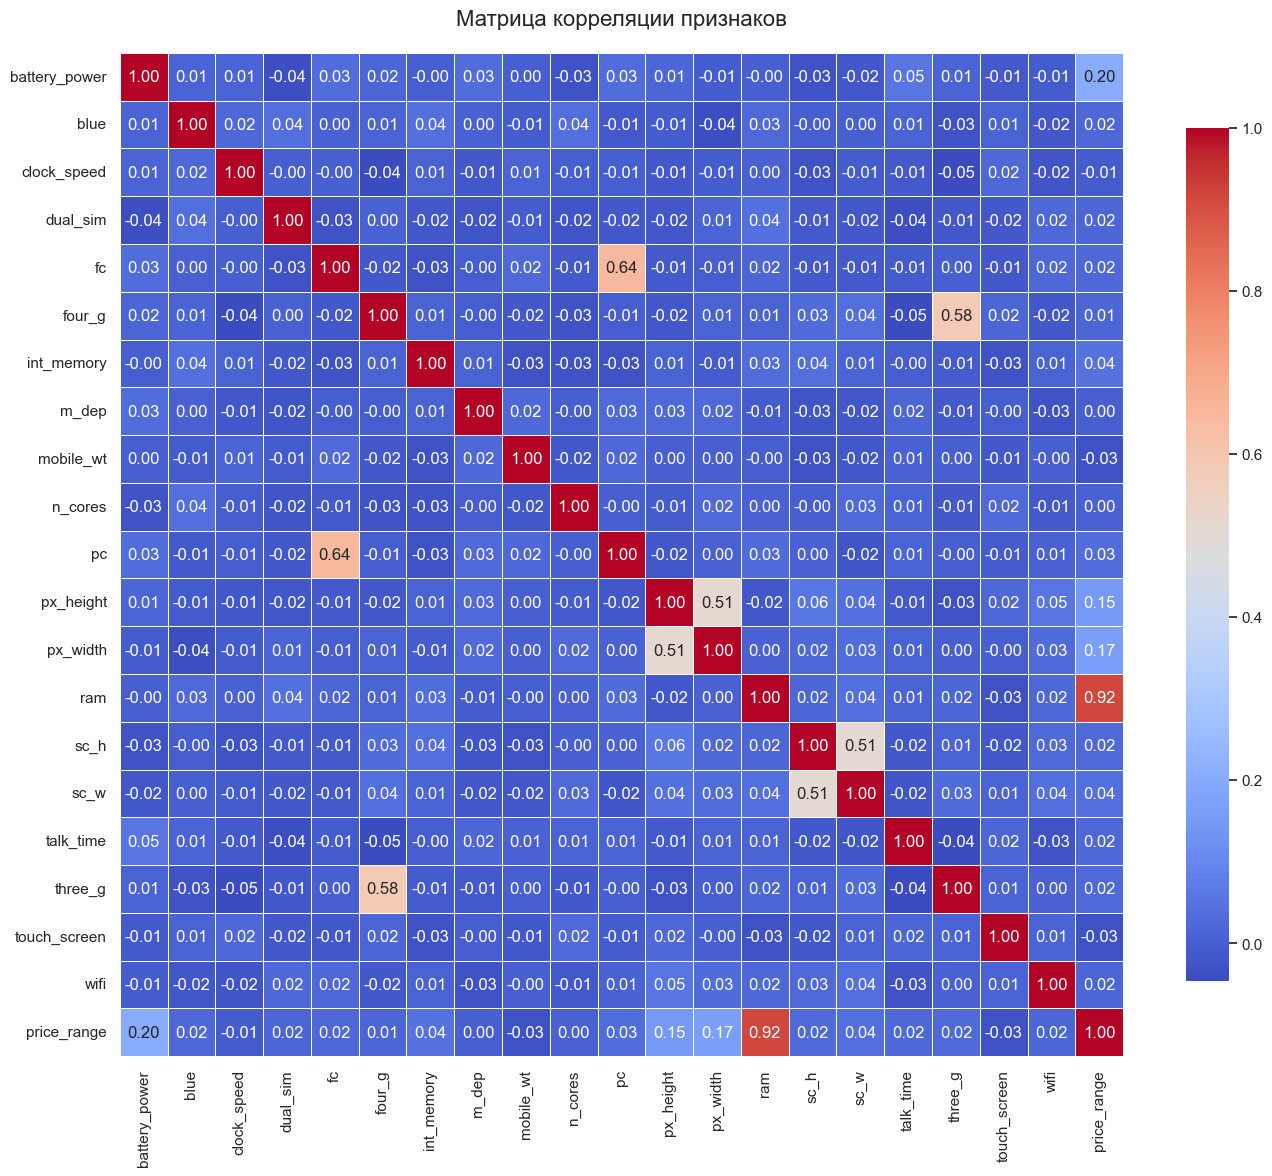

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.set(font_scale=1.0)  
sns.set_style("whitegrid")

# Тепловая карта
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,      
    fmt=".2f",         
    linewidths=0.5,      
    square=True,       
    cbar_kws={"shrink": 0.8}  
)

plt.title("Матрица корреляции признаков", fontsize=16, pad=20)
plt.tight_layout() 
plt.show()

### Задание 2

Реализуйте с нуля алгоритм логистической регрессии для многоклассовой классификации.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.classes_ = None
        self.weights_ = None
        self.bias_ = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _one_vs_rest(self, y, class_label):
        return np.where(y == class_label, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.weights_ = np.zeros((n_classes, n_features))
        self.bias_ = np.zeros(n_classes)

        for i, cls in enumerate(self.classes_):
            y_binary = self._one_vs_rest(y, cls)
            w = np.zeros(n_features)
            b = 0

            for _ in range(self.n_iter):
                linear = np.dot(X, w) + b
                y_pred = self._sigmoid(linear)

                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_binary))
                db = (1 / n_samples) * np.sum(y_pred - y_binary)

                w -= self.lr * dw
                b -= self.lr * db

            self.weights_[i] = w
            self.bias_[i] = b

    def predict_proba(self, X):
        linear = np.dot(X, self.weights_.T) + self.bias_
        probs = self._sigmoid(linear)
        return probs / probs.sum(axis=1, keepdims=True)

    def predict(self, X):
        probs = self.predict_proba(X)
        indices = np.argmax(probs, axis=1)
        return self.classes_[indices]

Обучите модель.

In [17]:
X = df.drop("price_range", axis=1).values
y = df["price_range"].values
feature_names = df.drop("price_range", axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Обучение модели ===
model = LogisticRegression(lr=0.1, n_iter=3000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность модели: {acc:.4f}")

Точность модели: 0.8425


### Задание 3

Реализуйте с нуля алгоритм Наивный Байес.

In [19]:
class NaiveBayes:
    def fit(self, X, y):
        """Обучение — вычисляем среднее, дисперсию и априорные вероятности"""
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        # Параметры для каждого класса
        self.means_ = np.zeros((n_classes, n_features))
        self.vars_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for i, cls in enumerate(self.classes_):
            X_c = X[y == cls]
            self.means_[i, :] = X_c.mean(axis=0)
            self.vars_[i, :] = X_c.var(axis=0) + 1e-9  # добавляем эпсилон для стабильности
            self.priors_[i] = X_c.shape[0] / n_samples

    def _gaussian_prob(self, class_idx, x):
        """Плотность вероятности по нормальному распределению"""
        mean = self.means_[class_idx]
        var = self.vars_[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        """Предсказывает метки классов"""
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)

    def _predict_single(self, x):
        """Предсказывает один объект"""
        posteriors = []

        for i, cls in enumerate(self.classes_):
            # log(P(class))
            prior = np.log(self.priors_[i])
            # log(P(x|class))
            class_conditional = np.sum(np.log(self._gaussian_prob(i, x)))
            # log(P(class|x)) ~ log(P(class)) + log(P(x|class))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes_[np.argmax(posteriors)]

Обучите модель.

In [20]:
X = df.drop("price_range", axis=1).values
y = df["price_range"].values

# Разделение train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (для стабильности)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Обучение модели ===
nb = NaiveBayes()
nb.fit(X_train, y_train)

# === Предсказание и оценка ===
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность модели: {acc:.4f}")

Точность модели: 0.7975


### Задание 4

Реализуйте с нуля алгоритм kNN.

In [24]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        """Сохраняем обучающую выборку"""
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        """Евклидово расстояние"""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        """Предсказываем метки классов для набора объектов"""
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        """Предсказание для одного объекта"""
        # Вычисляем расстояния до всех точек обучающей выборки
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        # Находим индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]

        # Берем метки этих соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Возвращаем наиболее частый класс (голосование)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

Обучите модель.

In [27]:
X = df.drop("price_range", axis=1).values
y = df["price_range"].values

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование — важно для KNN, чтобы все признаки были в одной шкале
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Обучаем и предсказываем ===
model = KNN(k=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность модели: {acc:.4f}")

Точность модели: 0.5450


### Задание 5

Сделайте выводы о результатах обучения.